# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
>**1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)**:

In [1]:
#import all the libraries

import pandas as pd
import numpy as np
import requests
import seaborn as sb
import matplotlib.pyplot as plt
import re 
import datetime
import json
import os
% matplotlib inline

In [2]:
#load the 3 dataset

In [3]:
tweet_df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
tweet_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
tweet_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
tweet_df['timestamp'][0]

'2017-08-01 16:23:56 +0000'

The timestamp is in object not timestamp as required

1. Drop some columns that is not needed 
2. The timestamp column should be in timestamp object
3. Remove some rows with tweet columns contains tweets with retweet, we need to drop them 
4. The numerator columns contains outliers , we can decide to fill  them systematical
5. The denominator also aply
6. we can extract this rating programmatically.

>**2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)**:

In [8]:
image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [9]:
image_predictions_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


>**3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)**:

In [12]:
list_storer  = []
with open("tweet-json.txt", "r") as file:
    lines = file.readlines()
    for line in lines:
        data = json.loads(line)
        list_storer.append( {"tweet_id":data["id"],"retweet_count":data["retweet_count"], "favourite_count" : data["favorite_count"]})
tweet_json_df = pd.DataFrame(list_storer)
        
        
        

In [13]:
tweet_json_df.head(5)

,favourite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [14]:
tweet_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Quality issues
1. Some columns contains none values which need to be replace by NAN

2. Some columns that are not needed for the analysis need to be drop 

3. The tweet columns that contains tweets with retweet, need to drop

4. Rating of the dogs need to be extract properly

5. The numerator columns that cointain outlier need to correct and fill properly

6. The denominator columns that cointain outlier need to correct and fill properly

7. Timestamp string need to be format properly to timestamp object

8. Some columns contain names that is consistent need to change to empty string

### Tidiness issues
1. Dog breeds appear in 4 different columns , we can merge into one column

2. Merge the 3 dataset into one twitter_archive_master.csv

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

###  Make copies of original pieces of data


In [15]:
tweet_df_copy = tweet_df.copy()

In [16]:
image_pred_df_copy = image_predictions_df.copy()

In [17]:
tweet_json_df_copy = tweet_json_df.copy()

## Checking the dataset data type information

In [18]:
tweet_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## checking for missing values in the dataset

In [19]:
tweet_df_copy.isna().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

The  columns with missing values were 
1. 'in_reply_to_status_id', 
2. 'in_reply_to_user_id', 
3. 'retweeted_status_id ', 
4. 'retweeted_status_user_id '
5. 'retweeted_status_timestamp',
6. 'expanded_urls', 

## Checking for duplicated values in the dataset

In [20]:
tweet_df_copy.duplicated().sum() #There is no duplicated value in the dataset

0

In [21]:
tweet_df_copy['timestamp'][0] #timestamp is in object data type not timestamp

'2017-08-01 16:23:56 +0000'

## Dataset Summary statistics

In [22]:
tweet_df_copy.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Both the rating numerator and denominator contains rating above 10, which are outliers

### Issue #1:

#### Define: Some columns that are not needed for the analysis need to be drop

#### Code

In [23]:
list_nt_need = ["in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id" ,
                "retweeted_status_user_id","retweeted_status_timestamp"]

In [24]:
list_to_drop = tweet_df_copy[list_nt_need]

In [25]:
tweet_df_copy.drop(list_nt_need, axis=1, inplace=True)

#### Test

In [26]:
tweet_df_copy.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #2:

#### Define Timestamp string need to be format to timestamp object

#### Code

In [27]:
tweet_df_copy['timestamp'] = pd.to_datetime(tweet_df_copy['timestamp'])

In [28]:
tweet_df_copy["timestamp"] = tweet_df_copy["timestamp"].dt.day_name()

#### Test

In [29]:
tweet_df_copy["timestamp"][:25] #c Converting to the actual day the tweet was made

0       Tuesday
1       Tuesday
2        Monday
3        Sunday
4      Saturday
5      Saturday
6        Friday
7        Friday
8      Thursday
9     Wednesday
10    Wednesday
11      Tuesday
12      Tuesday
13      Tuesday
14       Monday
15       Monday
16       Sunday
17     Saturday
18     Saturday
19       Friday
20     Thursday
21    Wednesday
22    Wednesday
23    Wednesday
24      Tuesday
Name: timestamp, dtype: object

### Issue #3:

#### Define:  Extract the dog rating properly

In [30]:
def func(R):
    if R['rating_numerator'] > 10:
        return 10
    return R['rating_numerator']

In [31]:
tweet_df_copy["rating_numerator"] = tweet_df_copy.apply(lambda x :func(x), axis = 1)

In [32]:
def func(R):
    if R['rating_denominator'] > 10:
        return 10
    return R['rating_denominator']

In [33]:
tweet_df_copy["rating_denominator"] = tweet_df_copy.apply(lambda x :func(x), axis = 1)

#### Test

In [34]:
tweet_df_copy['rating_numerator']

0       10
1       10
2       10
3       10
4       10
5       10
6       10
7       10
8       10
9       10
10      10
11      10
12      10
13      10
14      10
15      10
16      10
17      10
18      10
19      10
20      10
21      10
22      10
23      10
24      10
25      10
26      10
27      10
28      10
29      10
        ..
2326     2
2327     7
2328     9
2329    10
2330     6
2331     8
2332    10
2333     9
2334     3
2335     1
2336    10
2337    10
2338     1
2339    10
2340     8
2341     9
2342     6
2343    10
2344     9
2345    10
2346     8
2347     9
2348    10
2349     2
2350    10
2351     5
2352     6
2353     9
2354     7
2355     8
Name: rating_numerator, Length: 2356, dtype: int64

In [35]:
tweet_df_copy['rating_denominator']

0       10
1       10
2       10
3       10
4       10
5       10
6       10
7       10
8       10
9       10
10      10
11      10
12      10
13      10
14      10
15      10
16      10
17      10
18      10
19      10
20      10
21      10
22      10
23      10
24      10
25      10
26      10
27      10
28      10
29      10
        ..
2326    10
2327    10
2328    10
2329    10
2330    10
2331    10
2332    10
2333    10
2334    10
2335     2
2336    10
2337    10
2338    10
2339    10
2340    10
2341    10
2342    10
2343    10
2344    10
2345    10
2346    10
2347    10
2348    10
2349    10
2350    10
2351    10
2352    10
2353    10
2354    10
2355    10
Name: rating_denominator, Length: 2356, dtype: int64

### Issue #4:

#### Define:   Replace None strings  in the column with NAN

In [36]:
tweet_df_copy.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2033,671744970634719232,Tuesday,"<a href=""http://twitter.com/download/iphone"" r...",Very fit horned dog here. Looks powerful. Not ...,https://twitter.com/dog_rates/status/671744970...,6,10,None,None,None,None,None
740,780543529827336192,Monday,"<a href=""http://twitter.com/download/iphone"" r...",Here's a perturbed super floof. 12/10 would sn...,https://twitter.com/dog_rates/status/780543529...,10,10,None,None,None,None,None
1893,674752233200820224,Thursday,"<a href=""http://twitter.com/download/iphone"" r...",Everyone please just appreciate how perfect th...,https://twitter.com/dog_rates/status/674752233...,10,10,None,None,None,None,None
1737,679530280114372609,Wednesday,"<a href=""http://twitter.com/download/iphone"" r...",Guys this really needs to stop. We've been ove...,https://twitter.com/dog_rates/status/679530280...,7,10,a,None,None,None,None
504,813051746834595840,Sunday,"<a href=""http://twitter.com/download/iphone"" r...",This is Bauer. He had nothing to do with the c...,https://twitter.com/dog_rates/status/813051746...,10,10,Bauer,None,None,None,None
685,788150585577050112,Monday,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a golden chow. Rather h*ckin...,https://twitter.com/dog_rates/status/788150585...,10,10,Leo,None,None,None,None
2354,666029285002620928,Sunday,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
1831,676215927814406144,Monday,"<a href=""http://twitter.com/download/iphone"" r...",This is Herm. He just wants to be like the oth...,https://twitter.com/dog_rates/status/676215927...,9,10,Herm,None,None,None,None
2338,666104133288665088,Monday,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
2018,672139350159835138,Wednesday,"<a href=""http://twitter.com/download/iphone"" r...",This pup has a heart on its ass and that is do...,https://twitter.com/dog_rates/status/672139350...,10,10,None,None,None,None,None


In [37]:
list(tweet_df_copy)[7:] # extracting the columns with none values

['name', 'doggo', 'floofer', 'pupper', 'puppo']

In [38]:
non_list = list(tweet_df_copy)[7:]

In [39]:
for col in non_list:
    tweet_df_copy[col].replace("None",np.nan,inplace = True)

In [40]:
tweet_df_copy[['name', 'doggo', 'floofer', 'pupper', 'puppo']]

,name,doggo,floofer,pupper,puppo
0,Phineas,NaN,NaN,NaN,NaN
1,Tilly,NaN,NaN,NaN,NaN
2,Archie,NaN,NaN,NaN,NaN
3,Darla,NaN,NaN,NaN,NaN
4,Franklin,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,Jax,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Zoey,NaN,NaN,NaN,NaN
9,Cassie,doggo,NaN,NaN,NaN


In [41]:
#replace the Nan to empty strings
for x in non_list:
    tweet_df_copy[x].replace(np.nan,"",inplace = True)

In [42]:
tweet_df_copy[non_list]

,name,doggo,floofer,pupper,puppo
0,Phineas,,,,
1,Tilly,,,,
2,Archie,,,,
3,Darla,,,,
4,Franklin,,,,
5,,,,,
6,Jax,,,,
7,,,,,
8,Zoey,,,,
9,Cassie,doggo,,,


### Issue #5:

#### Define:  The tweet columns that contains tweets with retweet, need to drop

In [43]:
retweet_df = tweet_df_copy[tweet_df_copy["text"].str.contains("RT")]

In [44]:
retweet_df.index

Int64Index([  19,   32,   36,   68,   73,   74,   78,   80,   91,   95,
            ...
            1116, 1182, 1242, 1286, 1650, 1766, 1860, 1991, 2259, 2260],
           dtype='int64', length=192)

In [45]:
tweet_df_copy.drop(retweet_df.index,axis = 0, inplace = True)

#### Text:

In [46]:
tweet_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2164 non-null int64
timestamp             2164 non-null object
source                2164 non-null object
text                  2164 non-null object
expanded_urls         2106 non-null object
rating_numerator      2164 non-null int64
rating_denominator    2164 non-null int64
name                  2164 non-null object
doggo                 2164 non-null object
floofer               2164 non-null object
pupper                2164 non-null object
puppo                 2164 non-null object
dtypes: int64(3), object(9)
memory usage: 219.8+ KB


In [47]:
tweet_df_copy[tweet_df_copy["text"].str.contains("RT")]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #6:

#### Define:  Some columns contain names that is consistent need to change to empty string

In [48]:
list(tweet_df_copy[tweet_df_copy["name"].str.islower()]["name"].unique())


['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'very',
 'my',
 'his',
 'an',
 'actually',
 'just',
 'getting',
 'mad',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [49]:
unconsistent_name = list(tweet_df_copy[tweet_df_copy["name"].str.islower()]["name"].unique())

In [50]:
for i in unconsistent_name:
    tweet_df_copy['name'].replace(i, "",inplace = True)

#### Test

In [51]:
tweet_df_copy['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5               
6            Jax
7               
8           Zoey
9         Cassie
10          Koda
11         Bruno
12              
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
20        Gerald
21       Jeffrey
22              
23        Canela
24              
25              
26          Maya
27        Mingus
28         Derek
29        Roscoe
30              
          ...   
2326            
2327            
2328            
2329            
2330            
2331            
2332            
2333            
2334            
2335            
2336            
2337            
2338            
2339            
2340            
2341            
2342            
2343            
2344            
2345            
2346            
2347            
2348            
2349            
2350            
2351            
2352            
2353          

### Issue #7:

#### Define:  Dog breeds appear in 4 different columns , we need to merge into one column


In [52]:
tweet_df_copy['dog_breeds'] = tweet_df_copy["doggo"] + "," + tweet_df_copy["floofer"] + "," + tweet_df_copy["pupper"]+ tweet_df_copy["puppo"]

In [53]:
tweet_df_copy['dog_breeds'].value_counts()

,,                1822
,,pupper           223
doggo,,             74
,,puppo             24
doggo,,pupper       10
,floofer,            9
doggo,,puppo         1
doggo,floofer,       1
Name: dog_breeds, dtype: int64

In [54]:
def func(i):
    if i == ",,":
        return ""
    elif i == ",,pupper":
        return "pupper"
    elif i == ",,puppo":
        return "puppo"
    elif i == "doggo,,":
        return "doggo"
    elif i == "doggo,,pupper":
        return "doggo,pupper"
    elif i == ",floofer,":
        return "floofer"
    elif i == "doggo,,puppo":
        return "doggo,puppo"
    elif i == "doggo,floofer,":
        return "doggo,floofer"

In [55]:
tweet_df_copy["dog_breeds"] = tweet_df_copy["dog_breeds"].apply(lambda x : func(x))

In [56]:
tweet_df_copy["dog_breeds"].value_counts()

                 1822
pupper            223
doggo              74
puppo              24
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_breeds, dtype: int64

In [57]:
tweet_df_copy.drop(tweet_df_copy[tweet_df_copy["dog_breeds"] == ""].index,inplace = True)

#### Test

In [58]:
tweet_df_copy["dog_breeds"].value_counts()

pupper           223
doggo             74
puppo             24
doggo,pupper      10
floofer            9
doggo,floofer      1
doggo,puppo        1
Name: dog_breeds, dtype: int64

> pupper appears more than other dog breeds 

### Image prediction dataset

In [59]:
image_pred_df_copy.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1037,711998809858043904,https://pbs.twimg.com/tweet_video_thumb/CeGGkW...,1,comic_book,0.105171,False,kuvasz,0.059895,True,book_jacket,0.046638,False
1550,793120401413079041,https://pbs.twimg.com/media/CwG6zDfWcAA8jBD.jpg,1,Labrador_retriever,0.724944,True,golden_retriever,0.169744,True,kuvasz,0.035502,True
225,670338931251150849,https://pbs.twimg.com/media/CU2FsRnVAAA3TEg.jpg,1,cairn,0.245033,True,West_Highland_white_terrier,0.137709,True,miniature_schnauzer,0.089173,True
264,670797304698376195,https://pbs.twimg.com/media/CU8mlhoVAAAteS5.jpg,1,Pembroke,0.472197,True,beagle,0.090938,True,German_shepherd,0.064366,True
898,699779630832685056,https://pbs.twimg.com/media/CbYd3C9WEAErJ4Z.jpg,1,malinois,0.706038,True,German_shepherd,0.165655,True,Great_Dane,0.059048,True
507,676089483918516224,https://pbs.twimg.com/media/CWHzzFGXIAA0Y_H.jpg,1,bull_mastiff,0.743808,True,boxer,0.106697,True,American_Staffordshire_terrier,0.042335,True
1496,783391753726550016,https://pbs.twimg.com/media/Ct8qn8EWIAAk9zP.jpg,4,Norwegian_elkhound,0.877130,True,cairn,0.086241,True,keeshond,0.011019,True
1506,785533386513321988,https://pbs.twimg.com/media/CubGchjXEAA6gpw.jpg,2,miniature_pinscher,0.436023,True,black-and-tan_coonhound,0.258049,True,Rottweiler,0.145231,True
1840,837820167694528512,https://pbs.twimg.com/media/C6CI_jbVAAA3-a1.jpg,1,golden_retriever,0.887625,True,Labrador_retriever,0.068718,True,kuvasz,0.030387,True
432,674291837063053312,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True


In [60]:
image_pred_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [61]:
#check for duplicated
image_pred_df_copy.duplicated().any()

False

In [62]:
image_pred_df_copy.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Json dataset

In [63]:
tweet_json_df_copy.sample(10)

,favourite_count,retweet_count,tweet_id
2103,1635,835,670474236058800128
2214,265,79,668537837512433665
1193,3446,945,717421804990701568
183,12446,2068,856526610513747968
1885,871,230,674788554665512960
1818,2533,896,676588346097852417
1782,2134,1101,677662372920729601
1817,1001,142,676590572941893632
945,8157,3917,752519690950500352
1948,1325,534,673688752737402881


In [64]:
tweet_json_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favourite_count    2354 non-null int64
retweet_count      2354 non-null int64
tweet_id           2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [65]:
tweet_json_df_copy.duplicated().any()

False

In [66]:
tweet_df_copy.describe()

,tweet_id,rating_numerator,rating_denominator
count,3.420000e+02,342.000000,342.0
mean,7.450065e+17,9.730994,10.0
std,6.317061e+16,0.837626,0.0
min,6.721600e+17,3.000000,10.0
25%,6.864374e+17,10.000000,10.0
50%,7.354523e+17,10.000000,10.0
75%,7.962297e+17,10.000000,10.0
max,8.902403e+17,10.000000,10.0


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [67]:
twitter_archive_master_df = tweet_df_copy.merge(tweet_json_df_copy, on="tweet_id").merge(image_pred_df_copy,on = "tweet_id")

In [68]:
twitter_archive_master_df.to_csv('twitter_archive_master.csv', index=False)

In [69]:
twitter_archive_master_df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
178,705786532653883392,Friday,"<a href=""http://twitter.com/download/iphone"" r...","Seriously, add us 🐶 11/10 for sad wet pupper h...",https://twitter.com/dog_rates/status/705786532...,10,10,,,,...,1,web_site,0.550294,False,Labrador_retriever,0.148496,True,golden_retriever,0.148482,True
252,680176173301628928,Friday,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is patiently waiting to scare the ...,https://twitter.com/dog_rates/status/680176173...,10,10,,,,...,1,Christmas_stocking,0.207547,False,mask,0.193880,False,feather_boa,0.152738,False
287,673707060090052608,Monday,"<a href=""http://twitter.com/download/iphone"" r...",This is Raymond. He's absolutely terrified of ...,https://twitter.com/dog_rates/status/673707060...,10,10,Raymond,,,...,1,German_short-haired_pointer,0.935771,True,kelpie,0.022561,True,Labrador_retriever,0.008847,True
29,837110210464448512,Thursday,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He passed pupper training today...,https://twitter.com/dog_rates/status/837110210...,10,10,Clark,,,...,1,Siberian_husky,0.767696,True,Eskimo_dog,0.217079,True,malamute,0.011657,True
206,692905862751522816,Friday,"<a href=""http://twitter.com/download/iphone"" r...",This is Wally. He's being abducted by aliens. ...,https://twitter.com/dog_rates/status/692905862...,10,10,Wally,,,...,1,Mexican_hairless,0.162638,True,Doberman,0.156287,True,Rhodesian_ridgeback,0.081478,True


In [70]:
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 304
Data columns (total 26 columns):
tweet_id              305 non-null int64
timestamp             305 non-null object
source                305 non-null object
text                  305 non-null object
expanded_urls         305 non-null object
rating_numerator      305 non-null int64
rating_denominator    305 non-null int64
name                  305 non-null object
doggo                 305 non-null object
floofer               305 non-null object
pupper                305 non-null object
puppo                 305 non-null object
dog_breeds            305 non-null object
favourite_count       305 non-null int64
retweet_count         305 non-null int64
jpg_url               305 non-null object
img_num               305 non-null int64
p1                    305 non-null object
p1_conf               305 non-null float64
p1_dog                305 non-null bool
p2                    305 non-null object
p2_conf             

In [71]:
# Statistics Analysis
twitter_archive_master_df.describe()

,tweet_id,rating_numerator,rating_denominator,favourite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,3.050000e+02,305.000000,305.0,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,7.452785e+17,9.698361,10.0,11227.131148,3818.924590,1.265574,0.611433,0.136112,0.056363
std,6.479040e+16,0.881553,0.0,16555.493505,7482.522142,0.647588,0.268357,0.106592,0.050175
min,6.721600e+17,3.000000,10.0,693.000000,103.000000,1.000000,0.059033,0.000010,0.000001
25%,6.856674e+17,10.000000,10.0,2706.000000,877.000000,1.000000,0.394404,0.050512,0.014763
50%,7.323752e+17,10.000000,10.0,5575.000000,1759.000000,1.000000,0.638625,0.111380,0.040682
75%,8.004593e+17,10.000000,10.0,12531.000000,3652.000000,1.000000,0.841987,0.197486,0.085626
max,8.902403e+17,10.000000,10.0,132810.000000,79515.000000,4.000000,0.999984,0.467678,0.245653


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [72]:
twitter_archive_master_df.groupby("tweet_id")["favourite_count"].sum().sort_values(ascending = False)[:15]

tweet_id
822872901745569793    132810
744234799360020481    131075
866450705531457537    106827
819004803107983360     95450
739238157791694849     75163
825535076884762624     56413
795464331001561088     55683
881536004380872706     50199
819006400881917954     49960
846514051647705089     48410
855851453814013952     47844
733109485275860992     44619
826848821049180160     40325
679828447187857408     39726
889665388333682689     38818
Name: favourite_count, dtype: int64

In [73]:
twitter_archive_master_df.groupby("dog_breeds")["retweet_count"].sum().sort_values(ascending = False)

dog_breeds
pupper           479265
doggo            448919
puppo            142427
doggo,pupper      36751
floofer           34781
doggo,puppo       19196
doggo,floofer      3433
Name: retweet_count, dtype: int64

In [74]:
twitter_archive_master_df.corr()["p1_conf"].sort_values(ascending = False)

p1_conf               1.000000
img_num               0.226655
p1_dog                0.208371
p2_dog                0.198240
p3_dog                0.192960
rating_numerator      0.131819
tweet_id              0.101732
favourite_count       0.038512
retweet_count         0.016550
p2_conf              -0.483194
p3_conf              -0.698241
rating_denominator         NaN
Name: p1_conf, dtype: float64

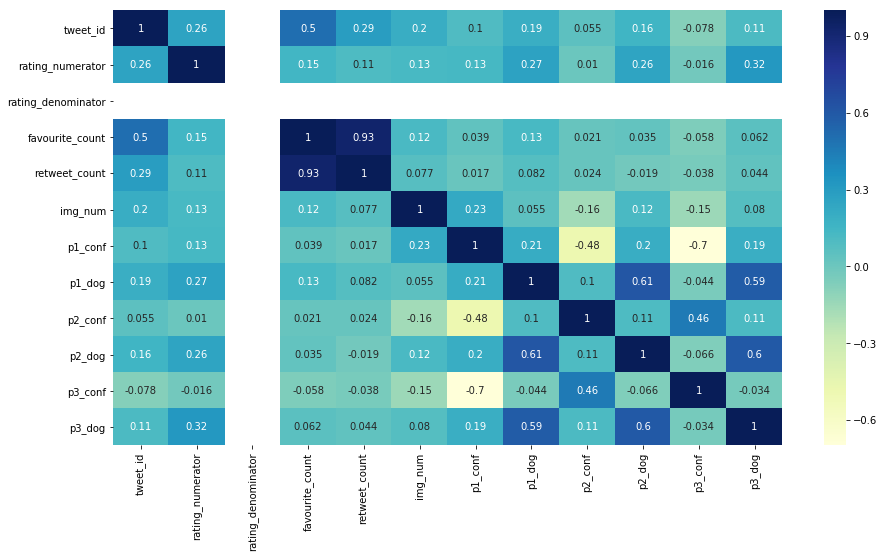

In [75]:
#plotting correlation heatmap
fig = plt.figure(figsize=(15,8))
dataplot = sb.heatmap(twitter_archive_master_df.corr(), cmap="YlGnBu", annot=True, )
  
# displaying heatmap
plt.show()

### Insights:
1. user with tweet_id 822872901745569793 has highest favourite count of  132810

2. Pupper dog breeds has the the highest retweet count of 479265479265

3. There very weak correlation between p1_conf and img_num

### Visualization

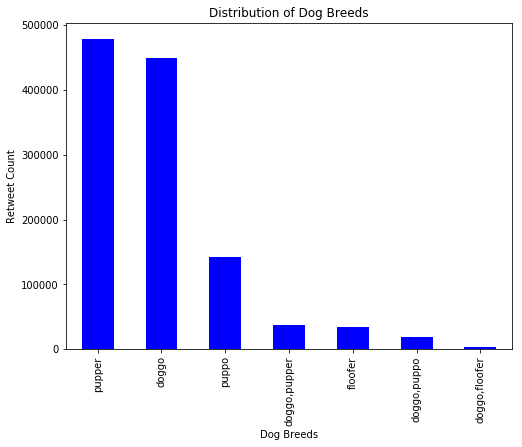

In [76]:
plt.figure(figsize=[8,6])
twitter_archive_master_df.groupby("dog_breeds")["retweet_count"].sum().sort_values(ascending = False).plot(kind='bar', 
                                                                                                           color=['blue']);
plt.title('Distribution of Dog Breeds')
plt.ylabel('Retweet Count')
plt.xlabel('Dog Breeds')
plt.show()

>> pupper has highest retweet count

In [77]:
twitter_archive_master_df.groupby("name")["retweet_count"].sum().sort_values(ascending = False)[:15]

name
             624794
Bo            46809
Jamesy        32883
Sunny         21794
Gabe          17209
Barney        13076
Cupid         11878
Sampson       11538
Sebastian     11007
Astrid        10706
Loki           8797
Pickles        8204
Baloo          7724
Cassie         7711
Craig          7444
Name: retweet_count, dtype: int64

> The dog name "Bo" have the highest retweet count of 46809

In [78]:
twitter_archive_master_df.drop(twitter_archive_master_df[twitter_archive_master_df["dog_breeds"] == ""].index,inplace = True)

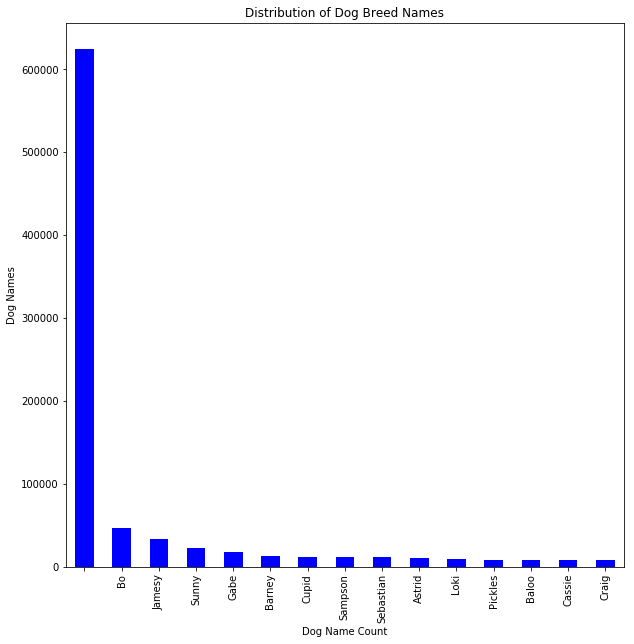

In [79]:
plt.figure(figsize=[10,10])
twitter_archive_master_df.groupby("name")["retweet_count"].sum().sort_values(ascending = False)[:15].plot(kind='bar', 
                                                                                                           color=['blue']);
plt.title('Distribution of Dog Breed Names')
plt.ylabel('Dog Names')
plt.xlabel('Dog Name Count');

>> Dog breed name "BO" has the highest retweet count

In [80]:
twitter_archive_master_df['retweet_count'].corr(twitter_archive_master_df['favourite_count'])

0.9315610397937425

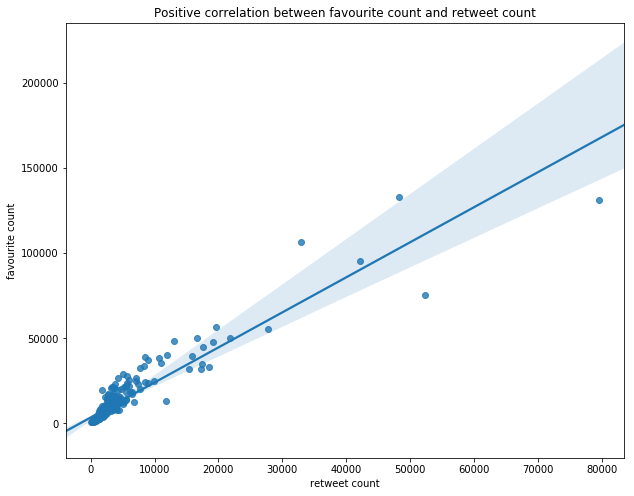

In [81]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
sb.regplot(twitter_archive_master_df['retweet_count'], twitter_archive_master_df['favourite_count'])
plt.title("Positive correlation between favourite count and retweet count")
plt.ylabel("favourite count")
plt.xlabel("retweet count")
plt.show()

>> There is a positive correlation between retweet count and favourite count this means that for tweet id with higher retweet count will lead to an increase in favorite count.

In [82]:
twitter_archive_master_df['rating_numerator'].corr(twitter_archive_master_df['favourite_count'])

0.14884755808586919

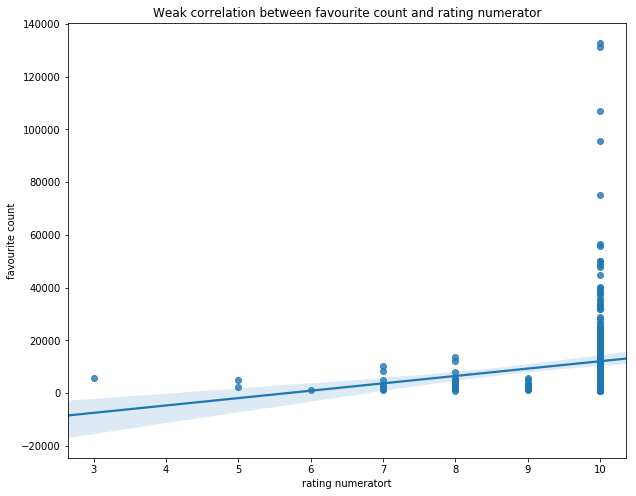

In [83]:
fig = plt.figure(figsize=(10,8))
sb.regplot(twitter_archive_master_df['rating_numerator'], twitter_archive_master_df['favourite_count'])
plt.title("Weak correlation between favourite count and rating numerator")
plt.ylabel("favourite count")
plt.xlabel("rating numeratort")
plt.show()

>> Weak positive correlation between favorite count and rating numerator

In [84]:
twitter_archive_master_df['rating_numerator'].corr(twitter_archive_master_df['retweet_count'])

0.10911873356220164

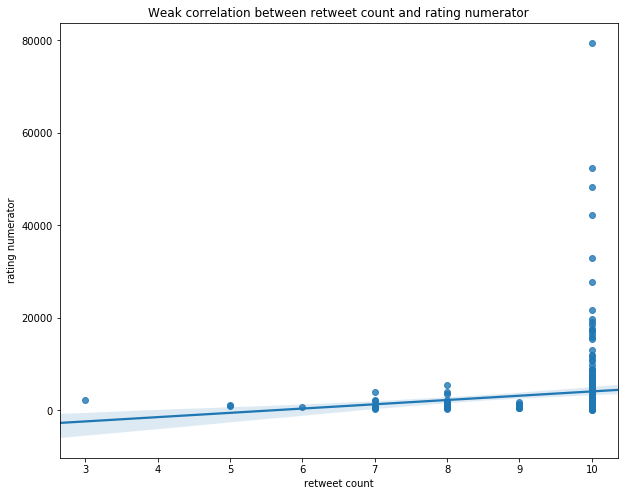

In [85]:
fig = plt.figure(figsize=(10,8))
sb.regplot(twitter_archive_master_df['rating_numerator'], twitter_archive_master_df['retweet_count'])
plt.title("Weak correlation between retweet count and rating numerator")
plt.ylabel("rating numerator")
plt.xlabel('retweet count')
plt.show()

>> Weak positive correlation between retweet count and rating numerator

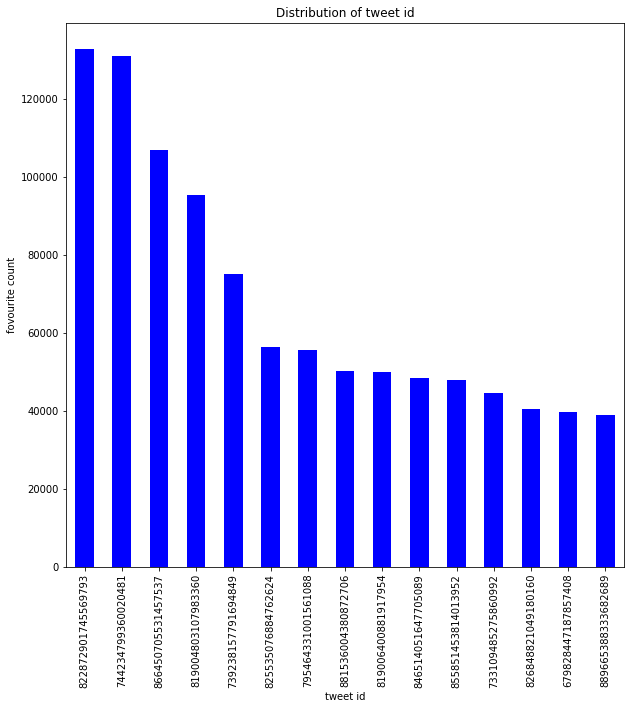

In [86]:
plt.figure(figsize=[10,10])
twitter_archive_master_df.groupby("tweet_id")["favourite_count"].sum().sort_values(ascending = False)[:15].plot(kind='bar', 
                                                                                                           color=['blue']);
plt.title('Distribution of tweet id')
plt.xlabel('tweet id')
plt.ylabel('fovourite count');

>> tweet id with **"822872901745569793"** has the highest favourite count of **"132810"**